import pandas_datareader as pdr

df_ggl = pdr.get_data_tiingo('GOOGL', api_key = '03cfac1a1589fc3c3e6ec7fc4bb3e98c4b1888fe')

df_ggl.head()

df_ggl.tail()

df_ggl.to_csv('GOOGL.csv')

df_ggl = pd.read_csv('GOOGL.csv')
df_ggl

# Previous work : ARIMA

In [1]:

from pandas import read_csv
from pandas.plotting import autocorrelation_plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('AAPL.csv')
df.head()
data=df[["date","close"]]
print(data)

                           date    close
0     2016-04-13 00:00:00+00:00  112.040
1     2016-04-14 00:00:00+00:00  112.100
2     2016-04-15 00:00:00+00:00  109.850
3     2016-04-18 00:00:00+00:00  107.480
4     2016-04-19 00:00:00+00:00  106.910
...                         ...      ...
1252  2021-04-05 00:00:00+00:00  125.900
1253  2021-04-06 00:00:00+00:00  126.210
1254  2021-04-07 00:00:00+00:00  127.900
1255  2021-04-08 00:00:00+00:00  130.360
1256  2021-04-09 00:00:00+00:00  132.995

[1257 rows x 2 columns]


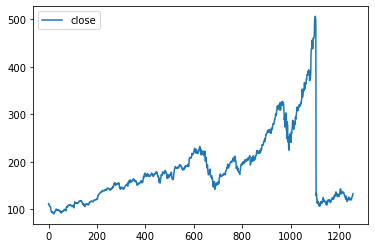

In [2]:
data.plot()

In [3]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(data.close.dropna())
print(f"ADF{result[0]}")
print(f"p value{result[1]}")

ADF-2.7369561093876427
p value0.06785864461845492


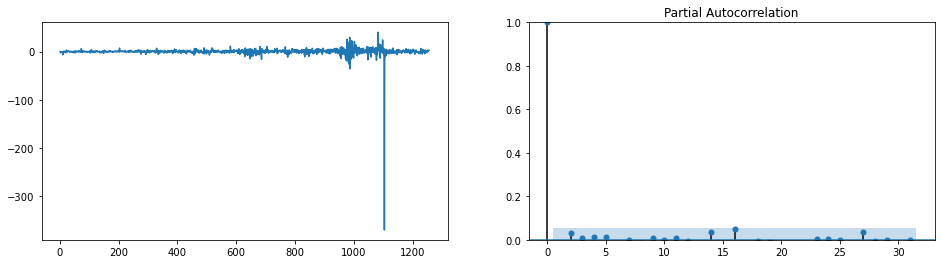

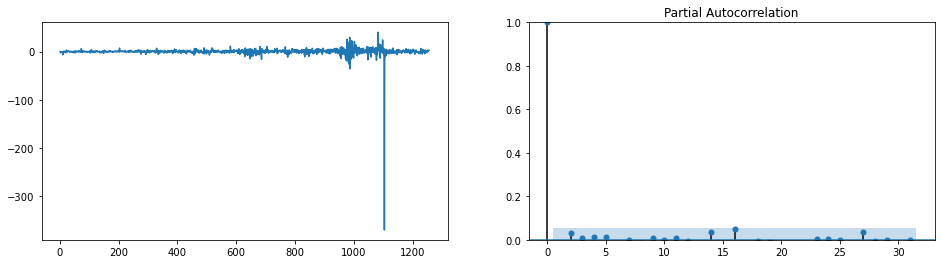

In [4]:
from statsmodels.graphics.tsaplots import plot_pacf
diff=data.close.diff().dropna()

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2)

In [5]:
from statsmodels.tsa.arima_model import ARIMA

model= ARIMA(data.close,order=(16,1,2))
result=model.fit(disp=0)

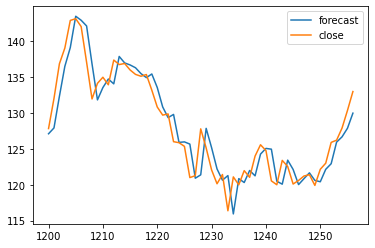

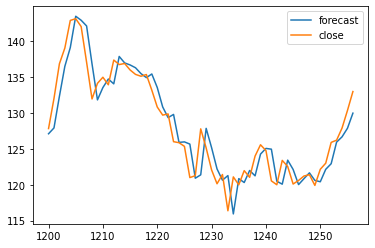

In [6]:
result.plot_predict(start=1200,end=1256,dynamic=False)

In [7]:
n= int(len(data)*0.65)
train=data.close[:n]
test=data.close[n:]

In [8]:
from statsmodels.tsa.arima_model import ARIMA

model= ARIMA(train,order=(16,1,2))
result=model.fit(disp=0)

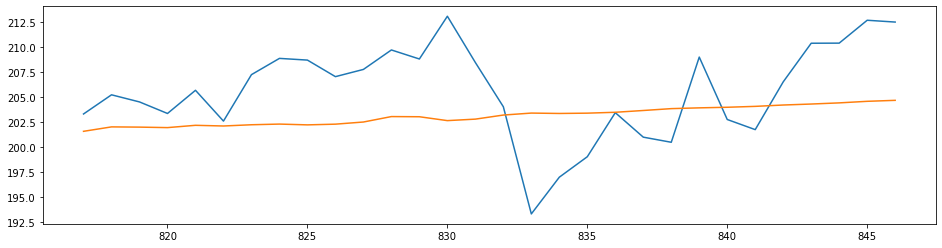

In [9]:
step=30
fc,se,conf =result.forecast(step)
fc=pd.Series(fc,index=test[:step].index)
lower=pd.Series(conf[:,0],index=test[:step].index)
upper=pd.Series(conf[:,1],index=test[:step].index)
plt.figure(figsize=(16,4))
plt.plot(test[:step],label="actual")
plt.plot(fc,label="forecast")


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_squared_error
import math

In [2]:
df_aapl = pd.read_csv('AAPL.csv')

In [3]:
df_aapl.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-04-13 00:00:00+00:00,112.04,112.34,110.80,110.80,33257316,26.047814,26.117560,25.759530,25.759530,133029264,0.0,1.0
1,AAPL,2016-04-14 00:00:00+00:00,112.10,112.39,111.33,111.62,25473923,26.061763,26.129184,25.882748,25.950169,101895692,0.0,1.0
2,AAPL,2016-04-15 00:00:00+00:00,109.85,112.30,109.73,112.11,46938969,25.538668,26.108260,25.510770,26.064088,187755876,0.0,1.0
3,AAPL,2016-04-18 00:00:00+00:00,107.48,108.95,106.94,108.89,60821461,24.987674,25.329430,24.862132,25.315481,243285844,0.0,1.0
4,AAPL,2016-04-19 00:00:00+00:00,106.91,108.00,106.23,107.88,32384879,24.855157,25.108568,24.697066,25.080669,129539516,0.0,1.0


In [4]:
df_aapl.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-04-05 00:00:00+00:00,125.900,126.1601,123.07,123.87,88651175,125.900,126.1601,123.07,123.87,88651175,0.0,1.0
1253,AAPL,2021-04-06 00:00:00+00:00,126.210,127.1300,125.65,126.50,80171253,126.210,127.1300,125.65,126.50,80171253,0.0,1.0
1254,AAPL,2021-04-07 00:00:00+00:00,127.900,127.9200,125.14,125.83,83466716,127.900,127.9200,125.14,125.83,83466716,0.0,1.0
1255,AAPL,2021-04-08 00:00:00+00:00,130.360,130.3900,128.52,128.95,88844591,130.360,130.3900,128.52,128.95,88844591,0.0,1.0
1256,AAPL,2021-04-09 00:00:00+00:00,132.995,133.0400,129.47,129.80,106686703,132.995,133.0400,129.47,129.80,106686703,0.0,1.0


In [5]:
df_aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1257 non-null   object 
 1   date         1257 non-null   object 
 2   close        1257 non-null   float64
 3   high         1257 non-null   float64
 4   low          1257 non-null   float64
 5   open         1257 non-null   float64
 6   volume       1257 non-null   int64  
 7   adjClose     1257 non-null   float64
 8   adjHigh      1257 non-null   float64
 9   adjLow       1257 non-null   float64
 10  adjOpen      1257 non-null   float64
 11  adjVolume    1257 non-null   int64  
 12  divCash      1257 non-null   float64
 13  splitFactor  1257 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.6+ KB


In [6]:
df1_aapl = df_aapl[['close']]
df1_aapl.head()

,close
0,112.04
1,112.10
2,109.85
3,107.48
4,106.91


In [7]:
df1_aapl['returns'] = df1_aapl.close.pct_change()
df1_aapl['log_returns'] = np.log(1 + df1_aapl['returns'])

<ipython-input-7-b90ea39ffb31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_aapl['returns'] = df1_aapl.close.pct_change()
<ipython-input-7-b90ea39ffb31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_aapl['log_returns'] = np.log(1 + df1_aapl['returns'])


In [8]:
df1_aapl.head()

,close,returns,log_returns
0,112.04,NaN,NaN
1,112.10,0.000536,0.000535
2,109.85,-0.020071,-0.020276
3,107.48,-0.021575,-0.021811
4,106.91,-0.005303,-0.005317


In [9]:
df1_aapl.dropna(inplace=True)

<ipython-input-9-ee4690431483>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_aapl.dropna(inplace=True)


In [10]:
df1_aapl.head()

,close,returns,log_returns
1,112.10,0.000536,0.000535
2,109.85,-0.020071,-0.020276
3,107.48,-0.021575,-0.021811
4,106.91,-0.005303,-0.005317
5,107.13,0.002058,0.002056


In [11]:
df1_aapl.shape, type(df1_aapl)

((1256, 3), pandas.core.frame.DataFrame)

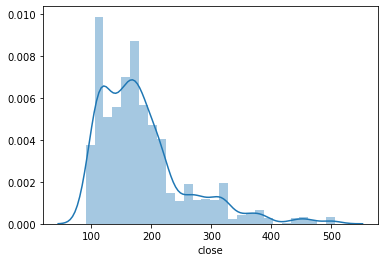

In [12]:
sns.distplot(df1_aapl['close'])

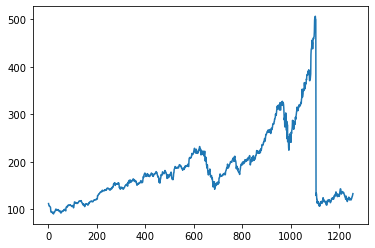

In [13]:
plt.plot(df1_aapl['close'])

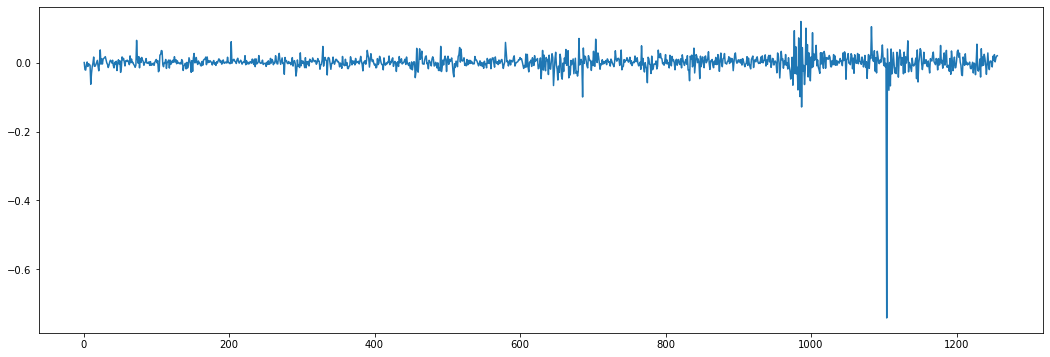

In [14]:
plt.figure(figsize=(18,6))
plt.plot(df1_aapl['returns'])

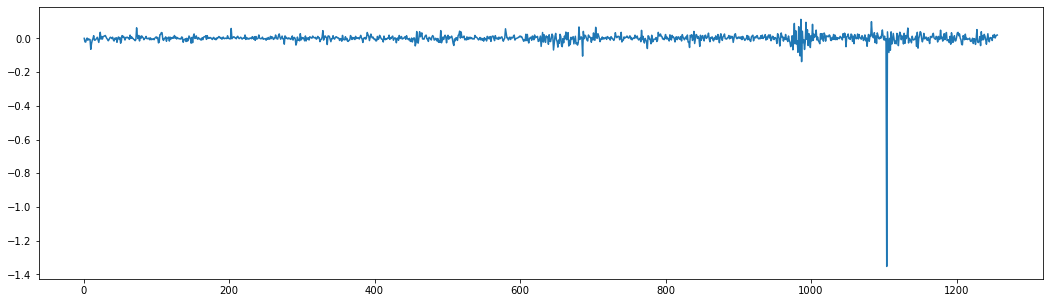

In [15]:
plt.figure(figsize=(18,5))
plt.plot(df1_aapl['log_returns'])

In [16]:
df1_aapl = df1_aapl[['close','log_returns']]

In [17]:
df1_aapl

,close,log_returns
1,112.100,0.000535
2,109.850,-0.020276
3,107.480,-0.021811
4,106.910,-0.005317
5,107.130,0.002056
...,...,...
1252,125.900,0.023304
1253,126.210,0.002459
1254,127.900,0.013302
1255,130.360,0.019051


In [18]:
## Studying the data is easier and good for models if it did not vary much
## Also LSTMs are sensitive to the scale of the data
## So we should apply a scaler to the data (here: MinMax scalar)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()   # feature_range=(0, 1) by default for MinMaxscaler

In [20]:
df1_aapl = scaler.fit_transform(df1_aapl)

In [21]:
df1_aapl.shape

(1256, 2)

In [22]:
df1_aapl

array([[0.05233915, 0.92318264],
       [0.04692724, 0.90898792],
       [0.0412267 , 0.90794059],
       ...,
       [0.09034275, 0.93189018],
       [0.09625977, 0.93581189],
       [0.10259771, 0.93646705]])

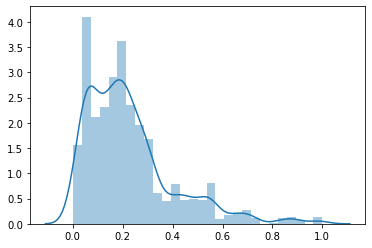

In [23]:
sns.distplot([x[0] for x in df1_aapl])

In [24]:
##splitting dataset into train and test split
training_size=int(len(df1_aapl)*0.65)
test_size=len(df1_aapl)-training_size
train_data,test_data=df1_aapl[0:training_size],df1_aapl[training_size:len(df1_aapl)]

In [25]:
training_size, test_size

(816, 440)

In [26]:
train_data

array([[0.05233915, 0.92318264],
       [0.04692724, 0.90898792],
       [0.0412267 , 0.90794059],
       ...,
       [0.26674684, 0.92696511],
       [0.27153337, 0.92952922],
       [0.26797354, 0.91783212]])

In [27]:
test_data

array([[0.27170174, 0.92803772],
       [0.27629585, 0.92919569],
       [0.27458809, 0.92045347],
       [0.27182201, 0.91897098],
       [0.27737823, 0.93052204],
       [0.26999399, 0.91255891],
       [0.28113049, 0.93823031],
       [0.28502706, 0.92812909],
       [0.28461816, 0.92226202],
       [0.28064943, 0.91740267],
       [0.28238124, 0.92518558],
       [0.2870475 , 0.92915759],
       [0.28488274, 0.9198835 ],
       [0.29512928, 0.93659473],
       [0.28404089, 0.9078958 ],
       [0.27343355, 0.90823102],
       [0.24774504, 0.88614353],
       [0.25654841, 0.93560882],
       [0.2614552 , 0.92984432],
       [0.27201443, 0.93769785],
       [0.26614552, 0.91458693],
       [0.26491882, 0.92108453],
       [0.28533975, 0.9511076 ],
       [0.27037883, 0.90220703],
       [0.26794949, 0.91941119],
       [0.27939868, 0.93872405],
       [0.28865905, 0.93541714],
       [0.2886831 , 0.92284989],
       [0.29416717, 0.93017047],
       [0.29373422, 0.92223984],
       [0.

# Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [29]:
def create_dataset_2D(dataset,time_step):
    x_data = []
    y_data = []
    
    for i in range(len(dataset) - time_step):
        x = dataset[i:i+time_step,0]
        x_data.append(x)
        y = dataset[i+time_step,0]
        y_data.append(y)
    
    return np.array(x_data),np.array(y_data)

In [30]:
time_step = 100
X_train_lr, y_train_lr = create_dataset_2D(train_data,time_step)
X_test_lr, y_test_lr = create_dataset_2D(test_data,time_step)

In [31]:
lr_model.fit(X_train_lr,y_train_lr)

LinearRegression()

## LR Score

In [32]:
lr_model.score(X_test_lr,y_test_lr)    # LR Score

0.9548916615242153

In [33]:
lr_model.coef_

array([ 0.03269164, -0.03624161, -0.02107609,  0.0041592 , -0.00583307,
       -0.00802145,  0.10020131, -0.02605092, -0.04017169,  0.06537214,
       -0.0506234 , -0.01810882,  0.04356287, -0.07799826,  0.07899536,
       -0.02482124, -0.08240038,  0.0620628 ,  0.07329127, -0.07037289,
        0.10740375, -0.06000863, -0.06402488,  0.01381657, -0.01988868,
        0.06870607, -0.05193425,  0.00573004,  0.03426457, -0.00192508,
       -0.03595061,  0.04204982,  0.00754605,  0.07000967, -0.1107609 ,
       -0.02101384, -0.06330878,  0.0933853 ,  0.01210431, -0.01714959,
       -0.0393185 ,  0.09159833, -0.1278062 ,  0.06566747,  0.07600902,
       -0.11089515,  0.00272288,  0.07218366, -0.09898279,  0.12140858,
       -0.00450857, -0.09393468,  0.01353398,  0.07722309, -0.09194111,
        0.09080234, -0.0420204 , -0.09644975,  0.05960919, -0.02255663,
        0.0136774 ,  0.0108046 ,  0.19048337, -0.16976119,  0.08688607,
       -0.12206464, -0.00413747,  0.02059566,  0.10806057, -0.08

In [34]:
lr_model.intercept_

0.0013493516926591786

In [35]:
lr_predictions_aapl_train = lr_model.predict(X_train_lr)

In [36]:
lr_predictions_aapl_train.shape

(716,)

In [37]:
lr_predictions_aapl_train = scaler.inverse_transform(np.c_[lr_predictions_aapl_train,np.zeros(lr_predictions_aapl_train.shape)])

In [38]:
lr_predictions_aapl_test = lr_model.predict(X_test_lr)

In [39]:
lr_predictions_aapl_test = scaler.inverse_transform(np.c_[lr_predictions_aapl_test,np.zeros(lr_predictions_aapl_test.shape)])

In [40]:
lr_predictions_aapl_train = [x[0] for x in lr_predictions_aapl_train]
lr_predictions_aapl_test = [x[0] for x in lr_predictions_aapl_test]

In [41]:
y_test_lr_inv = scaler.inverse_transform(np.c_[y_test_lr,np.zeros(y_test_lr.shape)])
y_test_lr_inv = [x[0] for x in y_test_lr_inv]

## LR Error
#### RMSE

In [42]:
math.sqrt(mean_squared_error(y_test_lr_inv,lr_predictions_aapl_test))      # LR RMSE 

23.66425348944426

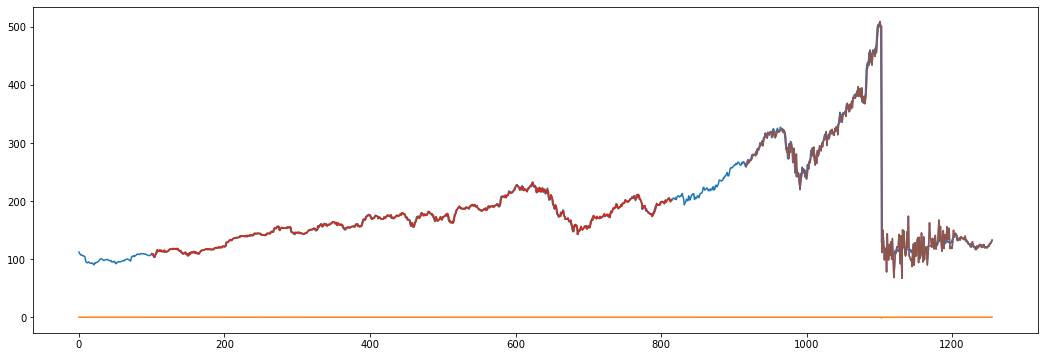

In [43]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1_aapl)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(lr_predictions_aapl_train)+look_back, :] = np.array(lr_predictions_aapl_train).reshape(-1,1)
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1_aapl)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(lr_predictions_aapl_train)+(look_back*2):len(df1_aapl), :] = np.array(lr_predictions_aapl_test).reshape(-1,1)
# plot baseline and predictions
plt.figure(figsize=(18,6))
plt.plot(scaler.inverse_transform(df1_aapl))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [44]:
x_input_lr = test_data[len(test_data)-time_step:,0].reshape(1,-1)
x_input_lr.shape
temp_input_lr = list(x_input_lr)
temp_input_lr = temp_input_lr[0].tolist()
len(temp_input_lr)

100

In [45]:
def predict_next_d_days_lr(d,time_step,temp_input):
    lst_output = []
    i = 0
    while i < d:
        
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[1:])
            #print(f"{i} day input {x_input}")
            y_hat = lr_model.predict(x_input.reshape(1,-1))
            #print(f"{i} day output {y_hat}")
            temp_input.extend(y_hat.tolist())
            temp_input = temp_input[1:]
            lst_output.extend(y_hat.tolist())
            i = i+1
        else:
            x_input = np.array(temp_input[:])
            y_hat = lr_model.predict(x_input.reshape(1,-1))
            #print(y_hat)
            temp_input.extend(y_hat.tolist())
            #print(len(temp_input))
            lst_output.extend(y_hat.tolist())
            i=i+1
            
    return lst_output

In [46]:
predictions_lr = predict_next_d_days_lr(100,time_step,temp_input_lr)

In [47]:
predictions_lr = scaler.inverse_transform(np.c_[predictions_lr,np.zeros(np.array(predictions_lr).shape)])

In [48]:
predictions_lr = [x[0] for x in predictions_lr]

In [49]:
day_new=np.arange(1,101)
day_pred=np.arange(101,201)

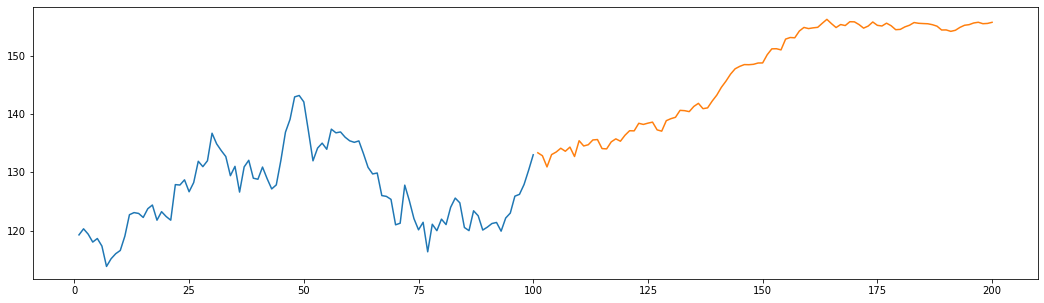

In [50]:
plt.figure(figsize=(18,5))
plt.plot(day_new,[x[0] for x in scaler.inverse_transform(df1_aapl[1156:])])
plt.plot(day_pred,predictions_lr)

### Regularization

In [51]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [52]:
alphas = [ 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
r_scores = []
for alpha in alphas:
    r_model = Ridge(alpha)
    r_model.fit(X_train_lr,y_train_lr)
    score = r_model.score(X_test_lr,y_test_lr)
    r_scores.append((alpha, score))

l_scores = []
for alpha in alphas:
    l_model = Lasso(alpha)
    l_model.fit(X_train_lr,y_train_lr)
    score = l_model.score(X_test_lr,y_test_lr)
    l_scores.append((alpha, score))
    
print('Ridge_scores:',r_scores)
print('Lasso_scores:',l_scores)

Ridge_scores: [(1e-05, 0.9549241626869257), (0.0001, 0.9552022907433619), (0.001, 0.9570192147109922), (0.01, 0.9581689137891111), (0.1, 0.9409180055474725), (1, 0.8773124263437451)]
Lasso_scores: [(1e-05, 0.9638519398876844), (0.0001, 0.9638011166797739), (0.001, 0.9206788006973318), (0.01, -0.3851029682562441), (0.1, -0.3851029682562441), (1, -0.3851029682562441)]


#### L1 regularization with alpha/lambda = 1e-05 gives us best performance with score = 0.9638519398876844

In [53]:
opt_l_model = Lasso(alpha=0.00001)
opt_l_model.fit(X_train_lr,y_train_lr)

Lasso(alpha=1e-05)

In [54]:
l_predictions_train = opt_l_model.predict(X_train_lr)

l_predictions_train = scaler.inverse_transform(np.c_[l_predictions_train,np.zeros(l_predictions_train.shape)])

l_predictions_train = [x[0] for x in l_predictions_train]

In [55]:
l_predictions_test = opt_l_model.predict(X_test_lr)

l_predictions_test = scaler.inverse_transform(np.c_[l_predictions_test,np.zeros(l_predictions_test.shape)])

l_predictions_test = [x[0] for x in l_predictions_test]

In [56]:
y_test_l_inv = scaler.inverse_transform(np.c_[y_test_lr,np.zeros(y_test_lr.shape)])
y_test_l_inv = [x[0] for x in y_test_l_inv]

## Error
#### RMSE

In [57]:
math.sqrt(mean_squared_error(y_test_l_inv,l_predictions_test))

21.18394749913535

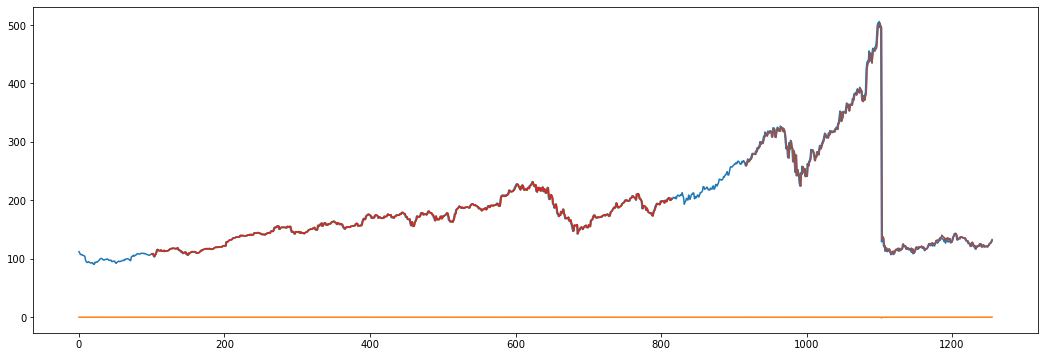

In [58]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1_aapl)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(l_predictions_train)+look_back, :] = np.array(l_predictions_train).reshape(-1,1)
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1_aapl)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(l_predictions_train)+(look_back*2):len(df1_aapl), :] = np.array(l_predictions_test).reshape(-1,1)
# plot baseline and predictions
plt.figure(figsize=(18,6))
plt.plot(scaler.inverse_transform(df1_aapl))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Support Vector Regression

In [59]:
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV

In [60]:
def hyperparameter_tuning(X_train, Y_train, X_test, Y_test, kernel):
    
    reg_params = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
    degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    gammas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]
    
    if kernel == 'linear':
        acc_list = []
        for reg in reg_params:
            svr = SVR(C = reg, kernel='linear')
            svr.fit(X_train, Y_train)
            ypred = svr.predict(X_test)
            acc = svr.score(X_test,Y_test)
            acc_list.append(acc)
            
        idx = np.argmin(acc_list)
        
        return reg_params[idx], acc_list[idx]
    
    elif kernel == 'poly':
        accuracy = 0
        reg_best = reg_params[0]
        degree_best = degrees[0]
        for reg in reg_params:
            for degree in degrees:
                svr = SVR(C=reg, kernel='poly', degree=degree)
                svr.fit(X_train, Y_train)
                ypred = svr.predict(X_test)
                acc = svr.score(X_test,Y_test)
                
                if acc>accuracy:
                    accuracy = acc
                    reg_best = reg
                    degree_best = degree
                    
        return reg_best, degree_best, accuracy
    
    elif kernel == 'rbf':
        accuracy = 0
        reg_best = reg_params[0]
        gamma_best = gammas[0]
        for reg in reg_params:
            for gamma in gammas:
                svr = SVR(C=reg, kernel='rbf', gamma=gamma)
                svr.fit(X_train, Y_train)
                ypred = svr.predict(X_test)
                acc = svr.score(X_test,Y_test)
                
                if acc>accuracy:
                    accuracy = acc
                    reg_best = reg
                    gamma_best = gamma
                    
        return reg_best, gamma_best, accuracy
    
    elif kernel == 'sigmoid':
        accuracy = 0
        reg_best = reg_params[0]
        gamma_best = gammas[0]
        for reg in reg_params:
            for gamma in gammas:
                svr = SVR(C=reg, kernel='sigmoid', gamma=gamma)
                svr.fit(X_train, Y_train)
                ypred = svr.predict(X_test)
                acc = svr.score(X_test,Y_test)
                
                if acc>accuracy:
                    accuracy = acc
                    reg_best = reg
                    gamma_best = gamma
                    
        return reg_best, gamma_best, accuracy
    
reg_linear, acc_linear = hyperparameter_tuning(X_train_lr, y_train_lr, X_test_lr, y_test_lr, kernel='linear')
reg_poly, degree, acc_poly = hyperparameter_tuning(X_train_lr, y_train_lr, X_test_lr, y_test_lr, kernel='poly')
reg_rbf, gamma_rbf, acc_rbf = hyperparameter_tuning(X_train_lr, y_train_lr, X_test_lr, y_test_lr, kernel='rbf')
reg_sigmoid, gamma_sigmoid, acc_sigmoid = hyperparameter_tuning(X_train_lr, y_train_lr, X_test_lr, y_test_lr, kernel='sigmoid')


print(reg_linear, acc_linear, reg_poly,degree, acc_poly, reg_rbf, acc_rbf, degree, gamma_rbf, reg_sigmoid, gamma_sigmoid, acc_sigmoid)

0.0001 -0.1896237601783477 0.001 2 0.4276146149443656 1000.0 0.2740820127191278 2 0.0001 100.0 0.001 0.27441973597944225


In [61]:
model_svr = SVR(C=0.001, degree = 2, kernel='poly')

In [62]:
model_svr.fit(X_train_lr,y_train_lr)

SVR(C=0.001, degree=2, kernel='poly')

## Score

In [63]:
model_svr.score(X_test_lr,y_test_lr)

0.4276146149443656

In [64]:
svr_predictions_aapl_train = model_svr.predict(X_train_lr)

In [65]:
svr_predictions_aapl_train = scaler.inverse_transform(np.c_[svr_predictions_aapl_train,np.zeros(svr_predictions_aapl_train.shape)])

In [66]:
svr_predictions_aapl_test = model_svr.predict(X_test_lr)

In [67]:
svr_predictions_aapl_test = scaler.inverse_transform(np.c_[svr_predictions_aapl_test,np.zeros(svr_predictions_aapl_test.shape)])

In [68]:
svr_predictions_aapl_train = [x[0] for x in svr_predictions_aapl_train]
svr_predictions_aapl_test = [x[0] for x in svr_predictions_aapl_test]

In [69]:
y_test_svr_inv = scaler.inverse_transform(np.c_[y_test_lr,np.zeros(y_test_lr.shape)])

y_test_svr_inv = [x[0] for x in y_test_svr_inv]

## Error
#### RMSE

In [70]:
math.sqrt(mean_squared_error(y_test_svr_inv,svr_predictions_aapl_test))  

84.2963289184508

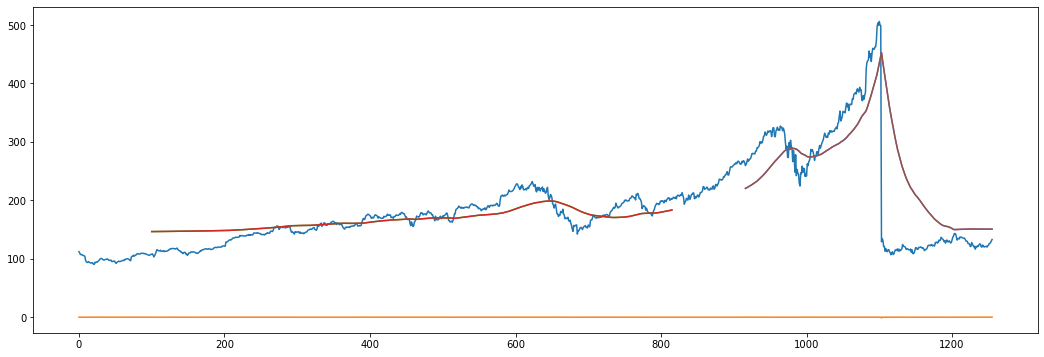

In [71]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1_aapl)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(svr_predictions_aapl_train)+look_back, :] = np.array(svr_predictions_aapl_train).reshape(-1,1)
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1_aapl)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(svr_predictions_aapl_train)+(look_back*2):len(df1_aapl), :] = np.array(svr_predictions_aapl_test).reshape(-1,1)
# plot baseline and predictions
plt.figure(figsize=(18,6))
plt.plot(scaler.inverse_transform(df1_aapl))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [72]:
x_input_svr = test_data[len(test_data)-time_step:,0].reshape(1,-1)
x_input_svr.shape
temp_input_svr = list(x_input_svr)
temp_input_svr = temp_input_svr[0].tolist()
len(temp_input_svr)

100

In [73]:
def predict_next_d_days_svr(d,time_step,temp_input):
    lst_output = []
    i = 0
    while i < d:
        
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[1:])
            #print(f"{i} day input {x_input}")
            y_hat = model_svr.predict(x_input.reshape(1,-1))
            #print(f"{i} day output {y_hat}")
            temp_input.extend(y_hat.tolist())
            temp_input = temp_input[1:]
            lst_output.extend(y_hat.tolist())
            i = i+1
        else:
            x_input = np.array(temp_input[:])
            y_hat = model_svr.predict(x_input.reshape(1,-1))
            #print(y_hat)
            temp_input.extend(y_hat.tolist())
            #print(len(temp_input))
            lst_output.extend(y_hat.tolist())
            i=i+1
            
    return lst_output

In [74]:
predictions_svr = predict_next_d_days_svr(100,time_step,temp_input_svr)

In [75]:
predictions_svr = scaler.inverse_transform(np.c_[predictions_svr,np.zeros(np.array(predictions_svr).shape)])

In [76]:
predictions_svr = [x[0] for x in predictions_svr]

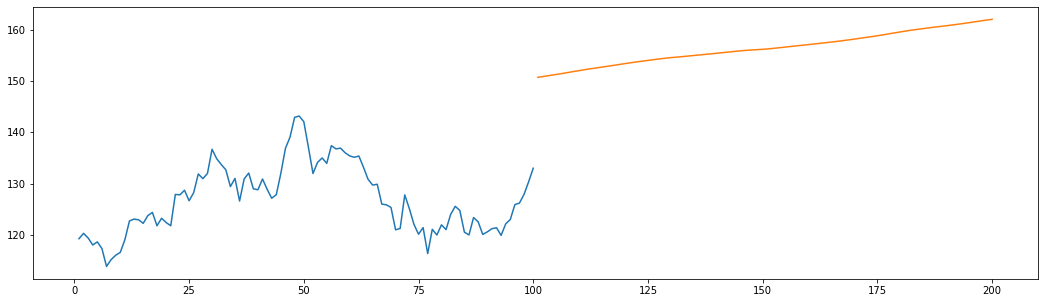

In [77]:
plt.figure(figsize=(18,5))
plt.plot(day_new,[x[0] for x in scaler.inverse_transform(df1_aapl[1156:])])
plt.plot(day_pred,predictions_svr)

# LSTM 

In [115]:
def create_dataset(dataset,time_step):
    x_data = []
    y_data = []
    
    for i in range(len(dataset) - time_step):
        x = dataset[i:i+time_step]
        x_data.append(x)
        y = dataset[i+time_step,0]
        y_data.append(y)
    
    return np.array(x_data),np.array(y_data)

In [116]:
time_step = 100
X_train, y_train = create_dataset(train_data,time_step)
X_test, y_test = create_dataset(test_data,time_step)

In [117]:
X_train

array([[[0.05233915, 0.92318264],
        [0.04692724, 0.90898792],
        [0.0412267 , 0.90794059],
        ...,
        [0.0379074 , 0.92346064],
        [0.03942273, 0.92685555],
        [0.04182802, 0.92917843]],

       [[0.04692724, 0.90898792],
        [0.0412267 , 0.90794059],
        [0.03985568, 0.91919056],
        ...,
        [0.03942273, 0.92685555],
        [0.04182802, 0.92917843],
        [0.04175586, 0.9226275 ]],

       [[0.0412267 , 0.90794059],
        [0.03985568, 0.91919056],
        [0.04038485, 0.92421962],
        ...,
        [0.04182802, 0.92917843],
        [0.04175586, 0.9226275 ],
        [0.04334336, 0.9269846 ]],

       ...,

       [[0.19203848, 0.91997771],
        [0.19352977, 0.92529791],
        [0.19261575, 0.92129827],
        ...,
        [0.27437162, 0.9284465 ],
        [0.27393867, 0.92221658],
        [0.26381239, 0.9086101 ]],

       [[0.19352977, 0.92529791],
        [0.19261575, 0.92129827],
        [0.19384245, 0.92485562],
        .

In [118]:
y_train[0]

0.041755862898376406

In [119]:
X_train.shape, y_train.shape

((716, 100, 2), (716,))

In [120]:
X_test.shape, y_test.shape

((340, 100, 2), (340,))

In [121]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 2)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 2)

In [122]:
X_train.shape, X_test.shape

((716, 100, 2), (340, 100, 2))

In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.callbacks import EarlyStopping

In [124]:
def create_model(n_neurons,input_shape):
    model = Sequential()
    model.add(LSTM(n_neurons,return_sequences=True,input_shape=input_shape))
    model.add(LSTM(n_neurons))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')
    
    return model

In [125]:
# We choose adam optimizer for optimization which is best 
# So for hypertuning the above created NN model we can change number of neurons in a layer, 
# batch size and number of epochs while training

# We will check for best number of neurons parameter and batch size parameter with max 150 epochs
# we will add early stopping to the process ,early stopping is a form of regularization used to avoid overfitting when training

num_neurons = [50,100,200]
batch_sizes = [16,32,64,128]
rmses = []
for n in num_neurons:
    print(n)
    rmses.append(n)
    model = create_model(n, X_train.shape[1:])
    for b in batch_sizes:
        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 100)
        model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=150, batch_size=b,verbose=0, callbacks=[es])
        predictions = model.predict(X_test)
        predictions = scaler.inverse_transform(np.c_[predictions,np.zeros(predictions.shape)])
        predictions = [x[0] for x in predictions]
        y_test_inv = scaler.inverse_transform(np.c_[y_test,np.zeros(y_test.shape)])
        y_test_inv = [x[0] for x in y_test_inv]
        test_rmse = math.sqrt(mean_squared_error(y_test_inv,predictions))
        print(b, test_rmse)
        rmses.append((b, test_rmse))

print(rmses)

50
16 22.000325754851815
Epoch 00127: early stopping
32 22.32861363255358
Epoch 00105: early stopping
64 24.681718320342316
Epoch 00110: early stopping
128 29.66701585705948
100
16 21.766331954212422
32 22.358952576786272
64 23.17912867760305
Epoch 00101: early stopping
128 22.934544622515663
200
16 21.414180804306607
32 21.821525423508938
Epoch 00143: early stopping
64 23.52553581044324
Epoch 00102: early stopping
128 24.506833419526224
[50, (16, 22.000325754851815), (32, 22.32861363255358), (64, 24.681718320342316), (128, 29.66701585705948), 100, (16, 21.766331954212422), (32, 22.358952576786272), (64, 23.17912867760305), (128, 22.934544622515663), 200, (16, 21.414180804306607), (32, 21.821525423508938), (64, 23.52553581044324), (128, 24.506833419526224)]


In [137]:
#rmse = [50,(16, 23.26763349066408),(32, 25.803455520929877),(64, 24.94302778607738),(128, 26.346997499073677),
        100,(16, 22.948563576708082),(32, 25.221760319588054),(64, 27.864285857272744),(128, 29.028458495705475),
        200,(16, 21.827420938817646),(32, 24.10872040740083),(64, 23.954775733874364),(128, 30.477912020859375),
        300,(16, 22.020518695054584),(32, 21.60011498140537)]

In [138]:
rmse

[50,
 (16, 23.26763349066408),
 (32, 25.803455520929877),
 (64, 24.94302778607738),
 (128, 26.346997499073677),
 100,
 (16, 22.948563576708082),
 (32, 25.221760319588054),
 (64, 27.864285857272744),
 (128, 29.028458495705475),
 200,
 (16, 21.827420938817646),
 (32, 24.10872040740083),
 (64, 23.954775733874364),
 (128, 30.477912020859375),
 300,
 (16, 22.020518695054584),
 (32, 21.60011498140537)]

In [96]:
opt_model = create_model(50,X_train.shape[1:])

In [97]:
opt_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 50)           10600     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 30,851
Trainable params: 30,851
Non-trainable params: 0
_________________________________________________________________


In [98]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 100, min_delta = 0.0008)
opt_model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=150, batch_size=16,verbose=1, callbacks=[es])

Epoch 1/150
45/45 [==============================] - 3s 65ms/step - loss: 0.0081 - val_loss: 0.0451
Epoch 2/150
45/45 [==============================] - 2s 45ms/step - loss: 8.9573e-04 - val_loss: 0.0150
Epoch 3/150
45/45 [==============================] - 2s 45ms/step - loss: 2.9035e-04 - val_loss: 0.0141
Epoch 4/150
45/45 [==============================] - 2s 45ms/step - loss: 2.8371e-04 - val_loss: 0.0137
Epoch 5/150
45/45 [==============================] - 2s 46ms/step - loss: 3.0002e-04 - val_loss: 0.0130
Epoch 6/150
45/45 [==============================] - 2s 45ms/step - loss: 2.5884e-04 - val_loss: 0.0125
Epoch 7/150
45/45 [==============================] - 2s 45ms/step - loss: 2.5047e-04 - val_loss: 0.0120
Epoch 8/150
45/45 [==============================] - 2s 45ms/step - loss: 2.4495e-04 - val_loss: 0.0115
Epoch 9/150
45/45 [==============================] - 2s 45ms/step - loss: 2.3521e-04 - val_loss: 0.0111
Epoch 10/150
45/45 [==============================] - 2s 45ms/step -

45/45 [==============================] - 2s 43ms/step - loss: 6.8226e-05 - val_loss: 0.0034
Epoch 80/150
45/45 [==============================] - 2s 43ms/step - loss: 7.0000e-05 - val_loss: 0.0035
Epoch 81/150
45/45 [==============================] - 2s 44ms/step - loss: 7.4840e-05 - val_loss: 0.0037
Epoch 82/150
45/45 [==============================] - 2s 46ms/step - loss: 7.1028e-05 - val_loss: 0.0035
Epoch 83/150
45/45 [==============================] - 2s 43ms/step - loss: 6.2361e-05 - val_loss: 0.0035
Epoch 84/150
45/45 [==============================] - 2s 43ms/step - loss: 7.2138e-05 - val_loss: 0.0032
Epoch 85/150
45/45 [==============================] - 2s 44ms/step - loss: 6.9622e-05 - val_loss: 0.0032
Epoch 86/150
45/45 [==============================] - 2s 43ms/step - loss: 6.9623e-05 - val_loss: 0.0034
Epoch 87/150
45/45 [==============================] - 2s 44ms/step - loss: 6.5819e-05 - val_loss: 0.0031
Epoch 88/150
45/45 [==============================] - 2s 45ms/step -

In [99]:
train_predict = opt_model.predict(X_train)
test_predict = opt_model.predict(X_test)

In [100]:
train_predict.shape

(716, 1)

In [101]:
test_predict.shape

(340, 1)

In [102]:
train_predict = scaler.inverse_transform(np.c_[train_predict,np.zeros(train_predict.shape)])
test_predict = scaler.inverse_transform(np.c_[test_predict,np.zeros(test_predict.shape)])

In [103]:
test_predict

array([[267.5723248 ,  -1.35294448],
       [262.76911986,  -1.35294448],
       [265.25948655,  -1.35294448],
       [269.26137261,  -1.35294448],
       [274.40249863,  -1.35294448],
       [270.19303761,  -1.35294448],
       [271.76244454,  -1.35294448],
       [274.25128722,  -1.35294448],
       [274.92617532,  -1.35294448],
       [278.73500787,  -1.35294448],
       [283.60196098,  -1.35294448],
       [283.97908502,  -1.35294448],
       [283.18584463,  -1.35294448],
       [283.5694488 ,  -1.35294448],
       [283.02959036,  -1.35294448],
       [287.8998269 ,  -1.35294448],
       [288.01228141,  -1.35294448],
       [293.87696468,  -1.35294448],
       [293.49083288,  -1.35294448],
       [295.21440012,  -1.35294448],
       [297.45231413,  -1.35294448],
       [304.547269  ,  -1.35294448],
       [300.95858757,  -1.35294448],
       [303.55968651,  -1.35294448],
       [302.00286814,  -1.35294448],
       [307.2427078 ,  -1.35294448],
       [313.9379387 ,  -1.35294448],
 

In [104]:
train_predict = [x[0] for x in train_predict]
test_predict = [x[0] for x in test_predict]

In [105]:
train_predict

[108.08870108347386,
 108.21816594168544,
 108.73143940899521,
 106.69435382742435,
 104.46278210930527,
 105.74626856591553,
 107.93334820974619,
 111.27888363614679,
 114.87332036733628,
 115.11727019228042,
 114.17613744657487,
 114.07751363251359,
 114.1610026761517,
 115.08628356192261,
 113.85985760591925,
 113.75392970085144,
 113.91521753571928,
 114.61212322317064,
 113.38744739923627,
 113.78453378021717,
 113.46186208553613,
 113.75185277421028,
 113.84241668801755,
 114.4964658228308,
 114.75761495452375,
 116.34387425906957,
 116.872017653808,
 117.79310751534999,
 117.73020498096943,
 118.2549007704109,
 118.3430485726893,
 118.33357927404344,
 118.09056182034314,
 118.01776871658862,
 117.6626777613163,
 118.41000893540681,
 119.02860473111272,
 117.08551827833057,
 115.82721668682993,
 114.99798088070006,
 114.68542897623033,
 113.02142973445356,
 112.70968629807234,
 111.26087431252003,
 110.15080735847354,
 111.06922400943935,
 111.7100217017904,
 111.64652443226427,


In [106]:
y_train_inv = scaler.inverse_transform(np.c_[y_train,np.zeros(y_train.shape)])

In [107]:
y_test_inv = scaler.inverse_transform(np.c_[y_test,np.zeros(y_test.shape)])

In [108]:
y_train_inv

array([[107.7       ,  -1.35294448],
       [108.36      ,  -1.35294448],
       [105.52      ,  -1.35294448],
       ...,
       [201.24      ,  -1.35294448],
       [203.23      ,  -1.35294448],
       [201.75      ,  -1.35294448]])

In [109]:
y_train_inv = [x[0] for x in y_train_inv]
y_test_inv = [x[0] for x in y_test_inv]

In [110]:
y_test_inv

[259.45,
 261.74,
 265.58,
 270.71,
 266.92,
 268.48,
 270.77,
 271.46,
 275.15,
 279.86,
 280.41,
 279.74,
 280.02,
 279.44,
 284.0,
 284.27,
 289.91,
 289.8,
 291.52,
 293.65,
 300.34999999999997,
 297.43,
 299.8,
 298.39,
 303.19,
 309.62999999999994,
 310.3299999999999,
 316.96,
 312.68,
 311.3399999999999,
 315.23999999999995,
 318.72999999999996,
 316.56999999999994,
 317.7,
 319.23,
 318.31,
 308.94999999999993,
 317.69,
 324.34,
 323.87,
 309.51,
 308.66,
 318.85,
 321.44999999999993,
 325.21,
 320.03,
 321.55,
 319.61,
 327.19999999999993,
 324.86999999999995,
 324.94999999999993,
 319.0,
 323.61999999999995,
 320.3,
 313.05,
 298.18,
 288.08,
 292.65,
 273.52,
 273.36,
 298.80999999999995,
 289.32,
 302.73999999999995,
 292.92,
 289.03,
 266.17,
 285.34,
 275.43,
 248.23,
 277.97,
 242.21,
 252.85999999999999,
 246.67,
 244.77999999999997,
 229.23999999999998,
 224.37000000000003,
 246.88000000000002,
 245.52,
 258.44,
 247.74,
 254.81,
 254.29,
 240.91,
 244.92999999999998,


In [111]:
import math
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_squared_error
train_rmse = math.sqrt(mean_squared_error(y_train_inv,train_predict))
train_rmse

3.5180817701534295

## Error
#### RMSE

In [112]:
test_rmse = math.sqrt(mean_squared_error(y_test_inv,test_predict))
test_rmse

20.966236650448273

In [113]:
train_predict

[108.08870108347386,
 108.21816594168544,
 108.73143940899521,
 106.69435382742435,
 104.46278210930527,
 105.74626856591553,
 107.93334820974619,
 111.27888363614679,
 114.87332036733628,
 115.11727019228042,
 114.17613744657487,
 114.07751363251359,
 114.1610026761517,
 115.08628356192261,
 113.85985760591925,
 113.75392970085144,
 113.91521753571928,
 114.61212322317064,
 113.38744739923627,
 113.78453378021717,
 113.46186208553613,
 113.75185277421028,
 113.84241668801755,
 114.4964658228308,
 114.75761495452375,
 116.34387425906957,
 116.872017653808,
 117.79310751534999,
 117.73020498096943,
 118.2549007704109,
 118.3430485726893,
 118.33357927404344,
 118.09056182034314,
 118.01776871658862,
 117.6626777613163,
 118.41000893540681,
 119.02860473111272,
 117.08551827833057,
 115.82721668682993,
 114.99798088070006,
 114.68542897623033,
 113.02142973445356,
 112.70968629807234,
 111.26087431252003,
 110.15080735847354,
 111.06922400943935,
 111.7100217017904,
 111.64652443226427,


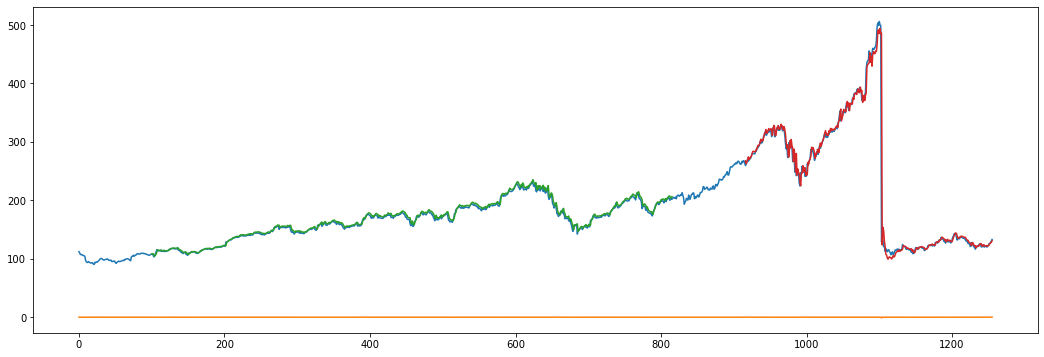

In [114]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like([[x[0]] for x in df1_aapl])
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = np.array(train_predict).reshape(-1,1)
# shift test predictions for plotting
testPredictPlot = np.empty_like([[x[0]] for x in df1_aapl])
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2):len(df1_aapl), :] = np.array(test_predict).reshape(-1,1)
# plot baseline and predictions
plt.figure(figsize=(18,6))
plt.plot(scaler.inverse_transform(df1_aapl))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### Predict for next d days

In [184]:
len(test_data)

440

In [185]:
#test_data[340:]

In [186]:
x_input = test_data[len(test_data)-time_step:]
x_input.shape

(100, 2)

In [214]:
temp_input = x_input

In [215]:
def predict_next_d_days(d, time_step,temp_input,model):
    
    lst_output = []
    i = 0
    while i < d:
        
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[1:])
            #print(f"{i} day input {x_input}")
            x_input = x_input.reshape(1,-1)
            x_input = x_input.reshape((1,time_step,2))
            y_hat = opt_model.predict(x_input,verbose=0)
            #print(f"{i} day output {y_hat}")
            temp_input = np.append(temp_input,[y_hat,np.log(1 + pd.Series([temp_input[-1][0],y_hat]).pct_change()[1][0])], axis = 0)
            temp_input = temp_input[1:]
            lst_output.extend(y_hat.tolist())
            i = i+1
        else:
            x_input = np.array(temp_input[:])
            x_input = x_input.reshape((1,time_step,2))
            y_hat = opt_model.predict(x_input,verbose=0)
            print(y_hat)
            temp_input = np.append(temp_input,[y_hat[0],np.log(1 + pd.Series([temp_input[-1][0],y_hat[0]]).pct_change()[1][0])], axis = 0)
            #print(len(temp_input))
            lst_output.extend(y_hat.tolist())
            i=i+1
            
    return lst_output

In [216]:
len(temp_input)

100

In [217]:
y_h = [[0.10012244]]

In [218]:
y_h[0]

[0.10012244]

In [219]:
pd.Series([temp_input[-1][0],y_h]).pct_change()[1][0]

array([-0.02412602])

In [220]:
predictions = predict_next_d_days(100,time_step,temp_input,opt_model)

[[0.10012244]]


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [ ]:
predictions

In [ ]:
len(df1_aapl)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1_aapl[len(df1_aapl)-time_step:]))
plt.plot(day_pred,scaler.inverse_transform(predictions))

In [ ]:
df3=df1_aapl.tolist()
df3.extend(predictions)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)